<a href="https://colab.research.google.com/github/pbcong/catvsdog/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#import libraries
import tensorflow as tf
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D, Flatten
import cv2
import imghdr

In [3]:
#check no of GPUs used for training
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
#using keras.utils to load image data (change the directory to where data is stored)
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data')             #this automatically resize the images to 256*256 and divide them into batches of 32 images
len(data)

Found 6000 files belonging to 2 classes.


188

In [5]:
scaled_iterator = data.as_numpy_iterator() #create new iterator for the new data
batch = scaled_iterator.next()

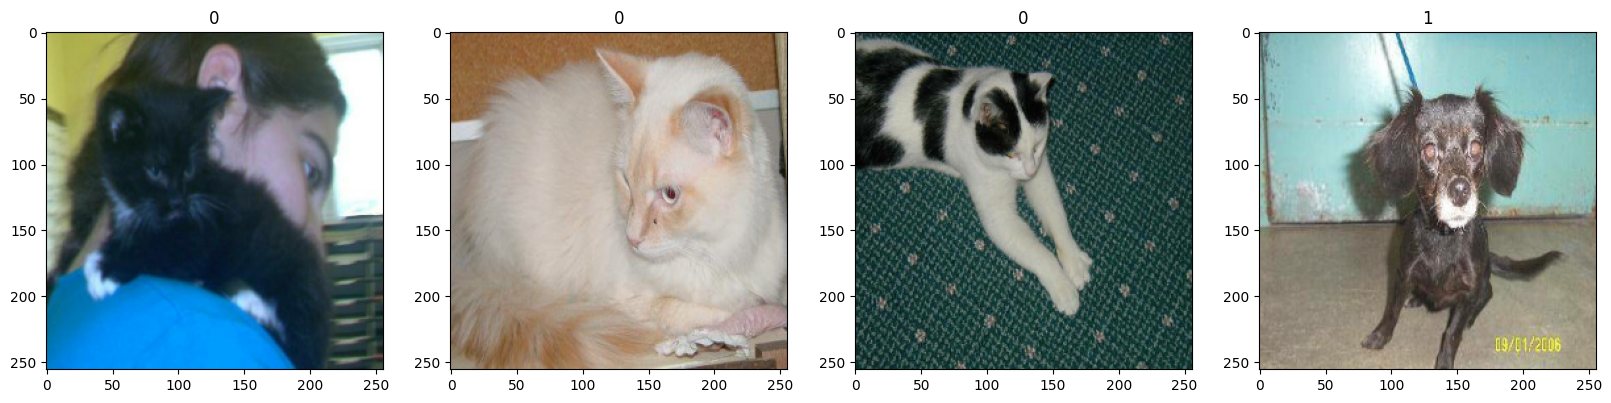

In [6]:
#checking the value mapped for dogs and cats
#0: cats
#1: dogs
fix, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
#map the RBG values of the images to values between 0 and 1 for more efficient training (divide by 255)
data = data.map (lambda x, y: (x/255, y))

In [8]:
scaled_iterator = data.as_numpy_iterator() #create new iterator for the new data
batch = scaled_iterator.next()

In [9]:
#checking the mapping (max = 1 and min = 0 is ok)
batch[0].max()
batch[0].min()

0.0

In [10]:
#spliting the data
train_size=int (len(data)*0.7)
val_size=int (len(data)*0.3)
train = data.take(train_size)
val=data.skip(train_size).take(val_size)

In [18]:
 #creating the model (binary classification)
 model = Sequential([
     Conv2D (32, (3, 3), 1, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), input_shape=(256, 256, 3)),
     MaxPooling2D(),
     Dropout(0.3),
     Conv2D (16, (3, 3), 1, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
     MaxPooling2D(),
     Dropout(0.3),
     Conv2D (32, (3, 3), 1, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
     MaxPooling2D(),
     Dropout(0.3),
     Flatten(),
     Dense (256, activation = 'relu'),
     Dense (1, activation='sigmoid')
 ])

In [19]:
#optimizer and early stopping
model.compile (
    optimizer='adam',
    loss = tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
early_stopping=EarlyStopping (
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 16)       

In [21]:
#fitting model
history=model.fit (
    train,
    epochs=100,
    validation_data=val,
    callbacks = early_stopping
)

Epoch 1/100
131/131 [==============================] - 62s 457ms/step - loss: 1.1761 - accuracy: 0.4957 - val_loss: 0.9551 - val_accuracy: 0.5329
Epoch 2/100
131/131 [==============================] - 40s 302ms/step - loss: 0.9111 - accuracy: 0.5456 - val_loss: 0.8788 - val_accuracy: 0.5536
Epoch 3/100
131/131 [==============================] - 44s 332ms/step - loss: 0.8408 - accuracy: 0.5682 - val_loss: 0.8073 - val_accuracy: 0.5859
Epoch 4/100
131/131 [==============================] - 43s 326ms/step - loss: 0.7862 - accuracy: 0.5887 - val_loss: 0.7734 - val_accuracy: 0.5893
Epoch 5/100
131/131 [==============================] - 62s 468ms/step - loss: 0.7411 - accuracy: 0.6236 - val_loss: 0.7180 - val_accuracy: 0.6189
Epoch 6/100
131/131 [==============================] - 44s 331ms/step - loss: 0.7038 - accuracy: 0.6469 - val_loss: 0.6843 - val_accuracy: 0.6529
Epoch 7/100
131/131 [==============================] - 62s 469ms/step - loss: 0.6721 - accuracy: 0.6725 - val_loss: 0.6552 -

In [1]:
#checking
plt.plot (history.history['loss'][:10])
plt.plot (history.history['val_loss'][:10])
plt.plot (history.history['val_accuracy'][:10])

NameError: name 'plt' is not defined

In [ ]:
model.save('/content/drive/MyDrive/models/catvsdog.h5')

In [ ]:
#np.expandims expand the dimension of the image array (to match the type required)
model.predict (np.expandims (resized/255, 0))